# 机器学习作业模板
- 姓名：边笛
- 学号：2012668
- 专业：计算机科学与技术

### 实验要求
题目：基于KNN 的手写数字识别
实验条件：给定semeion手写数字数据集，给定kNN分类算法
实验要求：
1. 基本要求：编程实现kNN算法；给出在不同k值（1，3，5）情况下，kNN算法对手写数字的识别精度（要求采用留一法）
2. 中级要求：与weka机器学习包中的kNN分类结果进行对比
3. 提高要求：将实验过程结果等图示展出

**截止日期：10月7日**
- 以.ipynb形式的文件提交，输出运行结果，并确保自己的代码能够正确运行
- 发送到邮箱：2120220594@mail.nankai.edu.cn

### 导入需要的包

In [2]:
import numpy as np
import operator
from collections import Counter
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier
from tqdm import tqdm
import matplotlib.pyplot as plt
import time

### 导入数据集 semesion

In [3]:
# 导入数据
def Img2Mat(fileName):
    f = open(fileName)
    ss = f.readlines()
    l = len(ss)
    f.close()
    returnMat = np.zeros((l,256))
    returnClassVector = np.zeros((l,1))
    for i in range(l):
        s1 = ss[i].split()
        for j in range(256):
            returnMat[i][j] = np.float(s1[j])
        clCount = 0
        for j in range(256,266):
            if s1[j] != '1':
                clCount += 1
            else:
                break
        returnClassVector[i] = clCount
    return returnMat,returnClassVector

In [4]:
X,y = Img2Mat('semeion.data')
np.shape(X), np.shape(y)

FileNotFoundError: [Errno 2] No such file or directory: 'semeion.data'

### 基本要求
编程实现kNN算法；给出不同k值（1，3，5）情况下，kNN算法对手写数字的识别精度（模板中采用的是普通方法分割训练集和测试集，作业中需要用留一法）

In [5]:
# KNN算法手动实现
def MyKnnClassifier(data_X, data_y, neighbors):
    # 生成数据集和测试集
    X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.2)
    trainShape = X_train.shape[0]   # 获得训练集的大小
    testShape = X_test.shape[0]     # 获得测试集的大小
    testRes = []  # 存放测试结果
    acc = 0   # 计算准确率
    for i in range(testShape):  # 针对测试集中每一个样本进行预测
        # 差异矩阵 = 该样本与训练集中所有样本之差构成的矩阵
        testDiffMat = np.tile(X_test[i],(trainShape , 1)) - X_train
        sqTestDiffMat = testDiffMat ** 2    # 将差异矩阵平方
        # 方差距离为方差矩阵的整行求和，是一个一位列向量
        sqTestDiffDis = sqTestDiffMat.sum(axis=1)
        testDiffDis = sqTestDiffDis ** 0.5  # 开方生成标准差距离
        sortIndex = np.argsort(testDiffDis)   # 将标准差距离按照下标排序
        labelCount = []
        for j in range(neighbors):  # 考察k近邻属于哪些类
            labelCount.append(y_train[sortIndex[j]][0])
        classifyRes = Counter(labelCount)    # 把k近邻中最多的那个标签作为分类结果
        classifyRes = classifyRes.most_common(2)[0][0]
        testRes.append(classifyRes)
        if classifyRes == y_test[i]:  # 分类正确则将accRate+1
            acc += 1
    accRate = acc / X_test.shape[0]
    print('k={0}时，测试个数为{1}  正确个数为：{2}  准确率为：{3}'.format(neighbors,X_test.shape[0],acc,accRate))
    return accRate

实验结果：

In [6]:
MyKnnClassifier(X, y, 1)
MyKnnClassifier(X, y, 3)
MyKnnClassifier(X, y, 5)

NameError: name 'X' is not defined

### 中级要求
模板中与sklearn机器学习包中的kNN分类结果进行对比（作业中需要与weka机器学习包中的kNN分类结果进行对比）

In [7]:
# kNN算法sklearn库实现
def KnnClassifier(data_X, data_y, neighbors, flag=0):
    X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.2)
    knn = KNeighborsClassifier(n_neighbors=neighbors)
    knn.fit(X_train, y_train.ravel())
    print('k={0}时，scikit-learn训练手写体识别的准确率为：{1}'.format(neighbors,knn.score(X_test, y_test)))
    # 交叉验证
    if flag == 1:
        scores = cross_val_score(knn,data_X,data_y.ravel(),cv=10,scoring='accuracy')
        return scores.mean()

实验结果：

In [8]:
KnnClassifier(X, y, 1)
KnnClassifier(X, y, 3)
KnnClassifier(X, y, 5)

NameError: name 'X' is not defined

### 高级要求
将实验过程结果等图示展出

In [9]:
scores1 = []
scores2 = []

for k in range(1,30):
    score1 = MyKnnClassifier(X, y, k)
    scores1.append(score1)
    
for k in range(1,30):
    score2 = KnnClassifier(X, y, k, 1)
    scores2.append(score2)

NameError: name 'X' is not defined

对图表的一些文字说明...

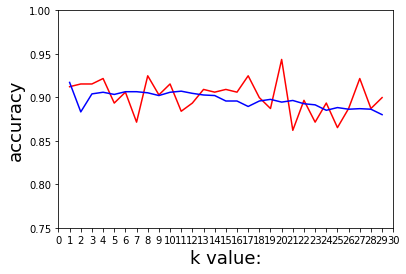

In [9]:
    plt.xlabel('k value:',fontsize=18)
    plt.ylabel('accuracy',fontsize=18)
    x_major_locator = plt.MultipleLocator(1)
    ax = plt.gca()
    ax.xaxis.set_major_locator(x_major_locator)
    plt.xlim(0, 30)
    plt.ylim(0.75, 1)
    # 普通kNN分类精度
    plt.plot(range(1,30),scores1,'r')
    plt.plot(range(1,30),scores2,'b')
    plt.show()

In [1]:
!pandadox

'pandadox' 不是内部或外部命令，也不是可运行的程序
或批处理文件。
